# Project: Analysis of Missed Medical Appointments in Brazil 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> With life expectancies and the cost of medical treatments growing worldwide as countries develop, healthcare is a major issues facing every nation. While the United States may have some of the highest healthcare costs in the world and its own unique challenges, these issues don't exist in a bubble, and valuable information can be learned by studying the healthcare systems of other countries. In this project, data concerning doctors visits in Brazil, provided by Kaggle, will be used to see what factors affect the chances that someone will make or miss their appointment. By gaining insight into what can lead to a reduction in missed appointments, it's possible to find solutions which can lead to  a system that provides better access to care at lowers costs for any country. 

> This project will include an exploratory data analysis into the dataset, and then focus on the three independent variables of patient age, patient disability status, and whether the patient received a text message reminder for the appointment. These factors will be analyzed in how they affect the dependent variable of the rate of appointment attendence.


In [1]:
# import statements for all packages
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

## General Properties

In [2]:
# Loading data from Kaggle and performing shape, info(), head(), and describe() to gain a general understanding of it
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.shape

(110527, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# confirming there are no null values
sum(df.isnull().any(axis=1))

0

> The columns in this data set are: <br/>
PatientId - A unique identification number for each patient <br/>
AppointmentID - A unique identification number for each appointment made <br/>
Gender - A M-F value showing the patient's gender <br/>
ScheduledDay - A date-time value for the day the appointment was scheduled <br/>
AppointmentDay - A date-time value for the day of the scheduled appointment <br/>
Age - The age of the patient <br/>
Neighbourhood - The name of the neighborhood where the appointment takes place <br/>
Scholarship - A 0-1 value showing whether the patient is receiving government assistance through the Bolsa Familia program <br/>
Hipertension - A 0-1 value showing whether the patient has high blood pressure <br/>
Diabetes - A 0-1 value showing whether the patient has diabetes <br/>
Alcoholism - A 0-1 value showing whether the patient has alcoholism <br/>
Handcap - A value showing whether the patient has a disability <br/>
SMS_received - A 0-1 value showing whether the patient received a text message for the appointment  <br/>
No-show - A No-Yes value with 'No' indicating the patient made the appointment, and 'Yes'  indicating the patient missed the appointment <br/>

> From the above functions it can be determined that the dataset is fairly clean, and actually has no null values that need to be addressed. Some of the values such as the '-1' minimum value of age, and the '4' maximum value for 'Handcap' are potentially erroneous, but will be explored further to investigate their cause. The column titles will be edited to improve readability. The columns PatientId, AppointmentID, ScheduledDay, and Neighbourhood will be removed as they either have no clear potential relationship with the dependent variable of whether a patient missed their appointment or not, or are outside the scope of this investigation. The column titles will also be edited for ease of use. An additional column showing a zero or one value for whether a patient attended their appointment or missed it, respectively, will also be added to make calculating percentages of various groups of patients easier in the analysis portion.

## Data Cleaning

> For the purposes of this project the PatientId, AppointmentID, ScheduledDay, and Neighbourhood columns will be dropped from the dataset. While it is possible that using PatientId to find individuals who had multiple appointments and tracking their rates of missed appointments could be useful, it's outside of the scope of this project. Additionally, with the information present, AppointmentID doesn't provide any unique information which could influence rates of missed appointments. It's not clear that the day an appointment is scheduled would have any effect on whether it would be missed, so for the scope of this project it won't be included. Finally, though Neighbourhood has the potential to play a large role in the number of missed appointments, without additional information such as income level and population density providing a greater sense of the causes for differences between neighborhoods, any analysis would be lacking in depth, and therefore will be left outside the scope of this project.

In [7]:
# dropping PatientId, AppointmentID, ScheduledDay, and Neighbourhood columns which won't be necessary for further analysis
df.drop(['PatientId','AppointmentID','ScheduledDay','Neighbourhood'], axis=1, inplace=True)
# confirming change
df.head()

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [8]:
# editing column titles for readability
df.rename(columns={'Gender':'gender','AppointmentDay':'appt_day','Age':'age','Scholarship':'govt_assist','Hipertension':'hypertension','Diabetes':'diabetes','Alcoholism':'alcoholism','Handcap':'disabled','SMS_received':'sms_rcvd','No-show':'appt_missed'}, inplace=True)
# confirming change
df.head()

,gender,appt_day,age,govt_assist,hypertension,diabetes,alcoholism,disabled,sms_rcvd,appt_missed
0,F,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [9]:
# checking range of dates for both appt_day
print(df['appt_day'].min())
print(df['appt_day'].max())

2016-04-29T00:00:00Z
2016-06-08T00:00:00Z


>The AppointmentDay column doesn't seem to have any time values, only dates. Converting this into day of the week values could be useful, as it's possible that more appointments are missed on certain days of the week.

In [10]:
# converting appt_day column into datetime format
df['appt_day'] = pd.to_datetime(df['appt_day'])
# confirming change
df.head()

,gender,appt_day,age,govt_assist,hypertension,diabetes,alcoholism,disabled,sms_rcvd,appt_missed
0,F,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29,56,0,1,1,0,0,0,No


In [11]:
# converting appt_day column from datetime to showing day of the week value
df['appt_day'] = df['appt_day'].dt.weekday_name
# confirming change
df.head()

,gender,appt_day,age,govt_assist,hypertension,diabetes,alcoholism,disabled,sms_rcvd,appt_missed
0,F,Friday,62,0,1,0,0,0,0,No
1,M,Friday,56,0,0,0,0,0,0,No
2,F,Friday,62,0,0,0,0,0,0,No
3,F,Friday,8,0,0,0,0,0,0,No
4,F,Friday,56,0,1,1,0,0,0,No


In [12]:
# check value counts of Age and check if '-1' min is an error
df['age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

>It doesn't seem that the '-1' Age is an error, but more likely is referring to a pregnancy.

In [13]:
# check value counts of Disabled to see if '4' max is an error
df['disabled'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: disabled, dtype: int64

>The max of '4' for the Disabled column is not in error and is a classification of disability, though the Kaggle website lists this data as being in 0-1 format only. 

In [14]:
# it may be useful to include an additional column of 0 and 1 values to show appt_missed
# 0 for attended the appointment, currently 'No'
# 1 for missed appointment, currently 'Yes'
df['appt_missed_num'] = df['appt_missed']
df.replace({'appt_missed_num': {'No':0, 'Yes': 1}}, inplace=True)
# confirming change
df['appt_missed_num'].value_counts()

0    88208
1    22319
Name: appt_missed_num, dtype: int64

In [15]:
# confirming cleaned dataframe
df.head()

,gender,appt_day,age,govt_assist,hypertension,diabetes,alcoholism,disabled,sms_rcvd,appt_missed,appt_missed_num
0,F,Friday,62,0,1,0,0,0,0,No,0
1,M,Friday,56,0,0,0,0,0,0,No,0
2,F,Friday,62,0,0,0,0,0,0,No,0
3,F,Friday,8,0,0,0,0,0,0,No,0
4,F,Friday,56,0,1,1,0,0,0,No,0


<a id='eda'></a>
# Exploratory Data Analysis

## General Analysis

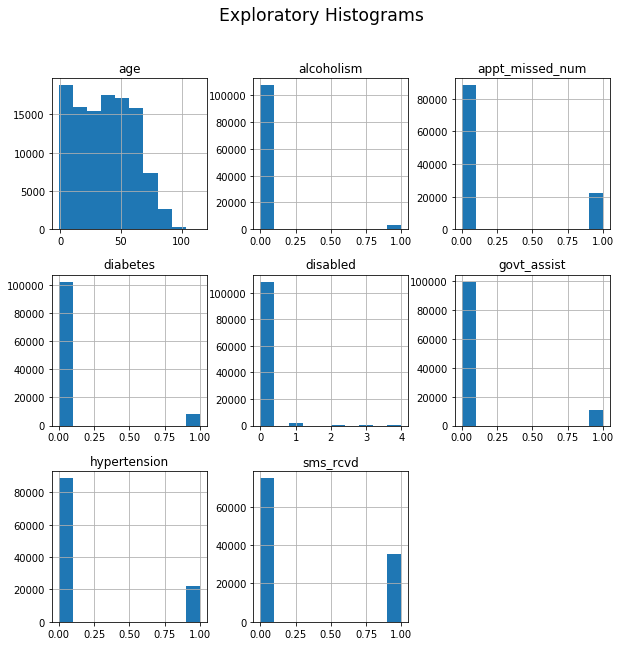

In [16]:
# general histograms of numeric variables
ax = df.hist(figsize=(10,10));
plt.suptitle('Exploratory Histograms', ha='center', fontsize='xx-large')
plt.ylabel('Patients')
plt.show()

>From this we can tell the age ranges skews right, with the majority of patients being 60 and under. Also the majority of patients are nonalcoholic, nondiabetic, not disabled, not receiving government assistance, don't have hypertension, and about a third of them received SMS messages.

In [17]:
# creating masks to separate patients who attended their appointments and patients who missed their appointments
attended = df.appt_missed == 'No'
missed = df.appt_missed == 'Yes'

In [18]:
# creating masks to separate patients receiving government assistance to compare their appointment attendance
yes_govt_assist = df.govt_assist == 1
no_govt_assist = df.govt_assist == 0

In [19]:
df.appt_missed_num[yes_govt_assist].mean()

0.23736304207715681

In [20]:
df.appt_missed_num[no_govt_assist].mean()

0.19807155900708365

>Patients receiving government assistance have a higher rate of missed appointments compared to those not receiving government assistance.

In [21]:
# creating masks to separate patients with hypertension from those without to compare their appointment attendance
high_pressure = df.hypertension == 1
avg_pressure = df.hypertension == 0

In [22]:
df.appt_missed_num[high_pressure].mean()

0.17301958625751113

In [23]:
df.appt_missed_num[avg_pressure].mean()

0.20903680995424115

>Patients without hypertension have a higher rate of missing their appointments compared to those with hypertension.

In [24]:
# creating masks to separate patients with diabetes from those without to compare their appointment attendance
diabetic = df.diabetes == 1
non_diabetic = df.diabetes == 0

In [25]:
df.appt_missed_num[diabetic].mean()

0.18003273322422259

In [26]:
df.appt_missed_num[non_diabetic].mean()

0.20362824612025268

>Patients without diabetes have a higher rate of missing their appointments compared to those with diabetes.

In [27]:
# creating masks to separate patients with alcoholism from those without to compare their appointment attendance
alcoholic = df.alcoholism == 1
non_alcoholic = df.alcoholism == 0

In [28]:
df.appt_missed_num[alcoholic].mean()

0.20148809523809524

In [29]:
df.appt_missed_num[non_alcoholic].mean()

0.20194649472318904

>Patients with and without alcoholism have similar rates of appointment attendance.

In [30]:
# creating masks to separate male and female patients to compare their appointment attendance
women = df.gender == 'F'
men = df.gender == 'M'

In [31]:
df.appt_missed_num[women].mean()

0.20314587973273943

In [32]:
df.appt_missed_num[men].mean()

0.19967947889471915

>Male and female patients have similar rates of appointment attendance.

In [33]:
# checking total numbers of appointments per day of the week
df['appt_day'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: appt_day, dtype: int64

>It appears that the vast majority of appointments occur on weekdays while an extremely small proportion occur on Saturdays and none take place on Sundays. 

In [34]:
# creating masks to separate patients by the day of the week of their appointments to compare their attendance
monday = df.appt_day == 'Monday'
tuesday = df.appt_day == 'Tuesday'
wednesday = df.appt_day == 'Wednesday'
thursday = df.appt_day == 'Thursday'
friday = df.appt_day == 'Friday'
saturday = df.appt_day == 'Saturday'
sunday = df.appt_day == 'Sunday'

In [35]:
df.appt_missed_num[monday].mean()

0.20647149460708783

In [36]:
df.appt_missed_num[tuesday].mean()

0.20093603744149766

In [37]:
df.appt_missed_num[wednesday].mean()

0.19689179263153825

In [38]:
df.appt_missed_num[thursday].mean()

0.19354090566475329

In [39]:
df.appt_missed_num[friday].mean()

0.21226142278773857

In [40]:
df.appt_missed_num[saturday].mean()

0.23076923076923078

>While there is some fluctuation across days of the week, with the few Saturday appointments having the highest rate of being missed, they are relatively consistent around 20%.

## Does Patient Age Affect Rates of Missed Appointments?

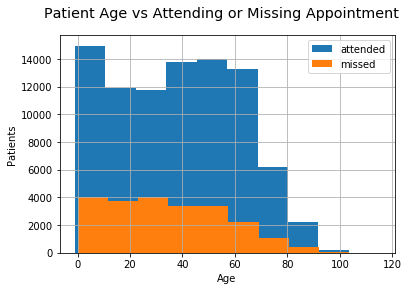

In [59]:
# histogram showing age breakdown of patients who attended their appointment and those who missed their appointment
df.age[attended].hist(label='attended')
df.age[missed].hist(label='missed')
plt.legend();
plt.suptitle('Patient Age vs Attending or Missing Appointment', size='x-large');
plt.xlabel('Age');
plt.ylabel('Patients');

>Both groups skew right, though there appears to be proportionally more people who missed their appointments in the 20-40 age range.

In [42]:
# comparing the ages of patients who attended their appointments to those who missed theirs
df.age[attended].mean()

37.790064393252315

In [43]:
df.age[missed].mean()

34.317666562121957

>While the mean age of those who attended their appointment is around 38, the mean age of those who missed their appointment is 34.

In [44]:
# creating masks to separate patients who are underage, adults, and above the minimum retirement age to compare their attendance
children = df.age <= 17
adults = df.query('age >= 18 & age <= 64')['age']
seniors = df.age >= 65

In [45]:
df.appt_missed_num[children].mean()

0.21902848794740687

In [46]:
df.appt_missed_num[adults].mean()

0.26396101534657068

In [47]:
df.appt_missed_num[seniors].mean()

0.15504791001249826

>The grouping with the highest rate of missed appointments is adults at 26%. Second are those 17 and under at 21% and the lowest are seniors at 15%. It's possible that this could be due to adults having to fit appointments in during the workweek, while seniors and children may have less obligations or more flexible schedules during that time, though at this point the information to prove that definitively isn't available. 

## Does Having a Disability Affect Rates of Missed Appointments?

In [48]:
# creating masks to separate patients by the various disability classifications to compare their appointment attendance 
disability_0 = df.disabled == 0
disability_1 = df.disabled == 1
disability_2 = df.disabled == 2
disability_3 = df.disabled == 3
disability_4 = df.disabled == 4

In [49]:
df.appt_missed_num[disability_0].mean()

0.20235302809227415

In [50]:
df.appt_missed_num[disability_1].mean()

0.1792360430950049

In [51]:
df.appt_missed_num[disability_2].mean()

0.20218579234972678

In [52]:
df.appt_missed_num[disability_3].mean()

0.23076923076923078

In [53]:
df.appt_missed_num[disability_4].mean()

0.33333333333333331

Text(0.5,1,'Rates of Missed Appointments For Disability Classifications')

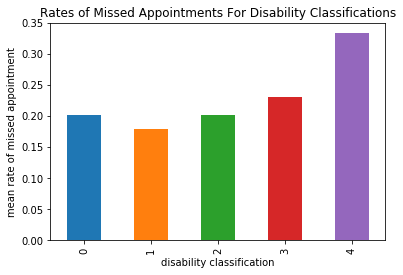

In [54]:
# bar chart visually showing mean rates of missed appointments for the disability classifications
ax3 = df.groupby('disabled').appt_missed_num.mean().plot(kind='bar');
ax3.set_xlabel('disability classification')
ax3.set_ylabel('mean rate of missed appointment');
ax3.set_title('Rates of Missed Appointments For Disability Classifications')

>People without disabilities have a rate of missed appointments at 20%, and while those with the disability label '1' have a lower rate at 18%, that rate then increases for each following disability label with '2' at 20%, '3' at 23%, and '4' at 33%. This is a concerning finding because it's likely that a person with a higher classification of disability would require a higher amount of medical services, and yet they are the most likely to miss an appointment. It's not possible to prove the causation in the project, but a possible cause could be a lack of proper assistance programs such as at-home care or transportation to medical facilities.

## Does Receiving a Text Message Affect Rates of Missed Appointments?

In [55]:
# creating masks to separate patients by whether or not they received a text message
yes_txt = df.sms_rcvd == 1
no_txt = df.sms_rcvd == 0

In [56]:
df.appt_missed_num[yes_txt].mean()

0.27574544839637

In [57]:
df.appt_missed_num[no_txt].mean()

0.16703311346525418

Text(0.5,1,'Text Reminders to Rates of Missed Appointments')

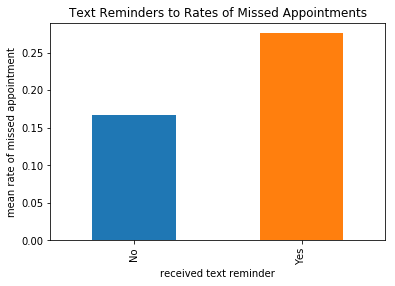

In [58]:
# bar chart visually showing mean rates of missed appointments for the disability classifications
ax4 = df.groupby('sms_rcvd').appt_missed_num.mean().plot(kind='bar');
ax4.set_xticklabels(['No', 'Yes'])
ax4.set_xlabel('received text reminder')
ax4.set_ylabel('mean rate of missed appointment');
ax4.set_title('Text Reminders to Rates of Missed Appointments')

>Surprisingly, patients who did receive a text message reminder for their appointment were actually more likely to miss that appointment. While patients who did not receive a text missed their appointment at a rate of 17%, those who did get a text missed their appointment at a rate of 28%. It's not possible within the scope of this project to find a cause for this discrepency, though it may relate to a potential difference between the populations of those who are receiving text reminders compared to those who do not. 

<a id='conclusions'></a>
# Conclusions

>Focusing on the dependent variable of whether a patient attended or missed their appointment and the three independent variables of patient age, disability status, and text reminders, several unexpected results were found. As a group, adults appeared to have a higher rate of 26% missed appointments compared to those 17 and under at 21% and those 65 and over at 15%. While those classified as not having a disability had a higher rate of missed appointments at 20% compared to those with a disabilitiy type '1' at 18%, the rate of missed appointments did increase with each disability classification. The highest rate was 33% for those with the disability type '4'. Finally, patients who received text messages were actually more likely to miss their appointment at a rate of 28%, compared to 17% for those who did not receive text messages.

## Further Research

>Further research into these findings would look into what factors are causing adults specifically to be more likely to miss their appointments compared to other age groups. Also looking into the definitions of the different disability classifications and what potential obstacles they may be facing in making their appointments. Then, looking into the text reminder program and seeing if there are differences between the group of patients who receive messages from the general patient population. In addition, bringing in demographic information about the various neighborhoods that were included in the original dataset would allow that column to be used to see if there are significant differences in the rates of missed appointments depending on location.

## Limitations

> The limitations of this project are primarily that of scope, time, and the dataset. Without further study into any of the correlations found, it is not possible to draw definitive conclusions about the causes of these findings. Recommendations for further areas of study are provided above under 'Further Research'. In addition, there were some aspects of the data which proved to be unclear, such as the classification system for disabilities, which was noted on the source website as being a boolean value rather than having five possible classes. Also, having a time field rather than just dates in the AppointmentDay field could be useful in determining if certain times of the day have differing rates of missed appointments. 